<a href="https://colab.research.google.com/github/jocode/intro-NPL-python-NLTK/blob/master/C6_Lexical_Resources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords

# Recursos léxicos (Lexicons)

- Son colecciones de palabras o frases que tienen asociadas etiquetas o meta información de algún tipo (POS tags, significados gramaticales, etc...)

**Comentario**  POS (Part p Speech)

In [0]:
# Vocabularios: Palabras unicas de un corpus
vocab = sorted(set(text1))
vocab

In [0]:
# Distribuciones: Frecuencias de aparición
word_freq = FreqDist(text1)

In [0]:
# Stopwords: Palabras muy usadas en el lenguaje que usualmente son filtradas en un pipeline de NLP (useless word)
stopwords.words('spanish')

# Fracción de Stopwords en un corpus

In [0]:
def stopwords_percentage(text):
  stopwd = stopwords.words('english')
  content = [w for w in text if w.lower() not in stopwd]
  return len(content)/len(text)

In [0]:
stopwords_percentage(text1)

0.5862954769399469

# Lexicons enriquecidos (listas comparativas de palabras)

- Construyendo **diccionarios para traducción** de palabras en diferentes palabras

In [0]:
import nltk
# nltk.download('swadesh')
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [0]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [0]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [0]:
traslate = dict(fr2es)
traslate['chien']

'perro'

In [0]:
traslate['jeter']

'tirar'

# WordNet

*Referencias*


* WordNet Lecture
* What is WordNet
* WordNe interface NLTK
* Las-WordNet



In [0]:
nltk.download('omw'); # Descarga la versión de WordNet en español
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

In [0]:
# Synsets: Grupo de sinónimos
ss = wn.synsets('carro', lang='spa')
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [0]:
# Explorar los synsets
for syn in ss:
  print(syn.name(), ' : ', syn.definition())
  for name in syn.lemma_names():
    print(' * ', name)

car.n.01  :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04  :  a machine part that carries something else
 *  carriage
carrier.n.02  :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01  :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02  :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01  :  the quantity that a cart holds
 *  cartload


# **Hyponyms**: Conceptos que són más específicos que la palabra raíz de la cual derivan

Con esta estructura, podemos aplicar a un motor de búsqueda, buscando palabras similares

In [0]:
ss[0].hyponyms() # Mostramos los hyponimos de car

In [0]:
ss[0].hypernyms() # Extrae lo hiperónimos de car

[Synset('motor_vehicle.n.01')]

In [0]:
import networkx as nx             # Permite hacer grafos de forma general
import matplotlib.pyplot as plt  # Permite hacer visualizaciones

def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

# Prepara la visualización
def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)  # configuración del Layout en Network X
  nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


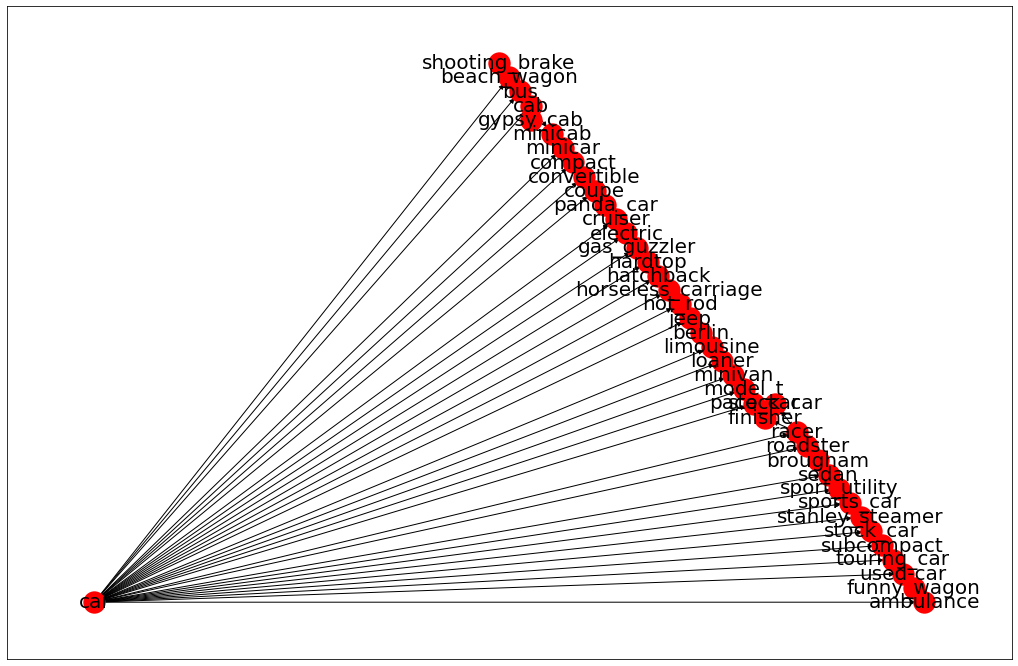

In [0]:
# Hyponyns: Conceptos que son más específicos que la palabra raíz de la cual derivan
G, labels = clousure_graph(ss[0], fn = lambda s : s.hyponyms())
draw_text_graph(G, labels)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


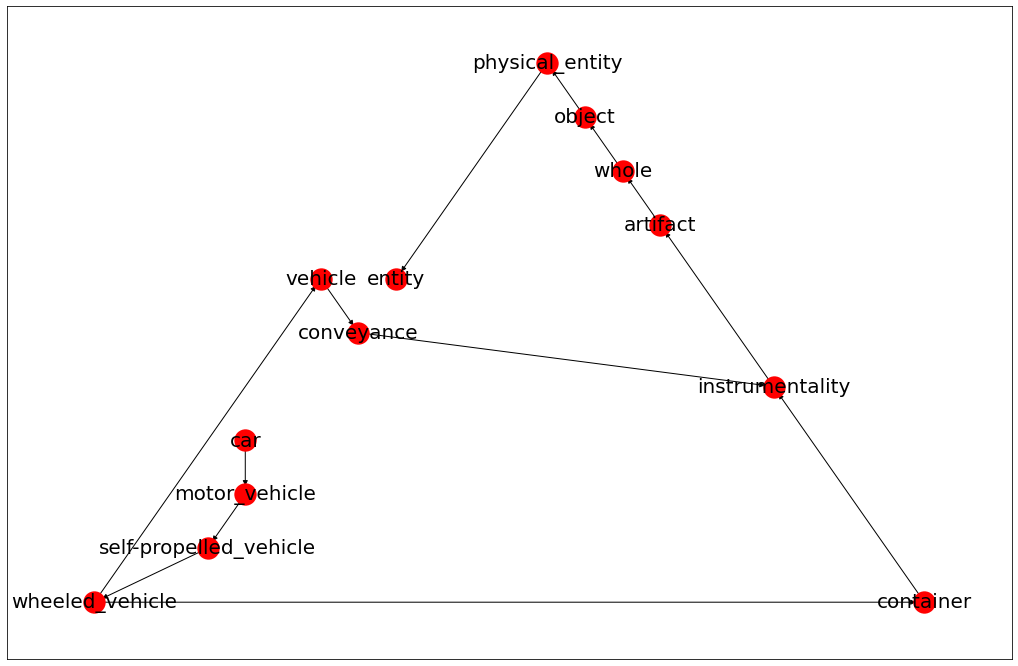

In [0]:
# Hypernyms: Conceptos que son más generales
G, labels = clousure_graph(ss[0], fn = lambda s : s.hypernyms())
draw_text_graph(G, labels)

## Similitud Semántica

In [0]:
def show_syns(word):
  ss = wn.synsets(word, lang='spa')
  for syn in ss:
    print(syn.name(), ' : ', syn.definition())
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [0]:
ss = show_syns('perro')

dog.n.01  :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01  :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [0]:
ss2 = show_syns('gato')

cat.n.01  :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02  :  male cat
 *  tom
 *  tomcat
dodger.n.01  :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [0]:
ss3 = show_syns('animal')

animal.n.01  :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02  :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01  :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [0]:
# Con ello podemos medir la similitud semántica
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

# Medimos el número de vértices entre las dos palabras
perro.path_similarity(gato)

0.2

In [0]:
animal.path_similarity(gato)

0.125

In [0]:
animal.path_similarity(perro)

0.3333333333333333

In [0]:
animal.path_similarity(animal)

1.0